## 1. Датасет

Для проекта я решил взять данные о том, где, когда и при каких обстоятельствах человечество якобы наблюдало за обитателями других планет и галактик.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ufo_sight = pd.read_csv('ufo-sightings/scrubbed.csv', low_memory=False)

In [3]:
ufo_sight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [4]:
ufo_sight

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


## 2. Первичный анализ данных

Я взял этот датасет с сайта Kaggle. Я так понимаю, что их собрали по выкладкам из газет и заявлениям граждан. С 1920 года удалось собрать 80332 набора данных о возможных конктактах, что позволяет предположить, что либо инопланетяне существуют, либо в мире достаточно людей с хорошим воображением.

В датасете есть данные о времени, месте, продолжительности возможного контакта, а также комментарии о том, что именно видели люди. В основном данные в формате object, попробуем преобразовать их к str или float64, чтобы получить, например, распределение продолжительности контакта.

Цель проекта - проанализировать все "контакты", тем самым получив модель взаимодействия "среднестатистического" инопланетянина с населением планеты Земля. Проверить гипотезу о том, что инопланетяне прилетают на Землю в основном в темное время суток. Проверить гипотезу о сезонности или периодичности появления "инопланетян". Посмотреть на распределение широты и долготы "контактов", понять изменилась ли модель поведения инопланетян со временем, допустим сравнивая прошлый век и текущий. Основываясь на этом, можно будет сделать предсказание места следующего "контакта", а так же попытаться сделать предположение о том, существуют инопланетяне или нет.

## 3. Предобработка данных.

Пройдемся по столбцам таблицы и посмотрим, что можно сделать.

In [5]:
ufo_sight['datetime']

0        10/10/1949 20:30
1        10/10/1949 21:00
2        10/10/1955 17:00
3        10/10/1956 21:00
4        10/10/1960 20:00
               ...       
80327      9/9/2013 21:15
80328      9/9/2013 22:00
80329      9/9/2013 22:00
80330      9/9/2013 22:20
80331      9/9/2013 23:00
Name: datetime, Length: 80332, dtype: object

In [6]:
ufo_sight['datetime'].value_counts()

7/4/2010 22:00      36
7/4/2012 22:00      31
11/16/1999 19:00    27
9/19/2009 20:00     26
7/4/2011 22:00      25
                    ..
7/2/1950 21:00       1
6/10/1969 01:00      1
2/2/2002 21:35       1
5/12/2011 23:28      1
8/10/2002 15:00      1
Name: datetime, Length: 69586, dtype: int64

In [7]:
ufo_sight['datetime'].isna().sum()

0

Слишком много информации в одном стоблце(много опечаток и записей вида 24:00, 15:60), поэтому, по моему мнению, лучше всего этот столбец разбить на год, время года, месяц, день, час, минута. Информация о конкретной минуте на первый взгляд не очень полезна, но мало ли. 

In [8]:
ufo_sight['datetime'] = ufo_sight['datetime'].astype(str)
ufo_sight['year'] = list(map(lambda s: s.split('/')[2].split()[0], ufo_sight['datetime']))
ufo_sight['year'] = ufo_sight['year'].astype(int)
ufo_sight['day'] = list(map(lambda s: int(s.split('/')[1]), ufo_sight['datetime']))
ufo_sight['month'] = list(map(lambda s: int(s.split('/')[0]), ufo_sight['datetime']))
def time_of_year(month):
    if month in [1, 2, 12]:
        return 'winter'
    elif month <= 5:
        return 'spring'
    elif month <= 8:
        return 'summer'
    else:
        return 'autumn'
ufo_sight['season'] = list(map(time_of_year, ufo_sight['month']))
ufo_sight['season'] = ufo_sight['season'].astype('category')
ufo_sight['hour'] = list(map(lambda s: int(s.split('/')[2].split()[1].split(':')[0]) % 24, ufo_sight['datetime']))
ufo_sight['minute'] = list(map(lambda s: int(s.split('/')[2].split()[1].split(':')[1]) % 60, ufo_sight['datetime']))
ufo_sight

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,day,month,season,hour,minute
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949,10,10,autumn,20,30
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949,10,10,autumn,21,0
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955,10,10,autumn,17,0
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956,10,10,autumn,21,0
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960,10,10,autumn,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,2013,9,9,autumn,21,15
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,2013,9,9,autumn,22,0
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,2013,9,9,autumn,22,0
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,2013,9,9,autumn,22,20


Столбец datetime не будет нам нужен.

In [9]:
ufo_sight.drop(['datetime'], axis=1, inplace=True)

Рассмотрим теперь столбцы city, state, country

In [10]:
ufo_sight['city'].value_counts()

seattle                      525
phoenix                      454
portland                     374
las vegas                    368
los angeles                  353
                            ... 
steamboat                      1
ritzville (near; on i-90)      1
westchester county             1
banja luka (bosnia)            1
heerlen (netherlands)          1
Name: city, Length: 19900, dtype: int64

In [11]:
ufo_sight['city'].isna().sum()

0

In [12]:
ufo_sight['country'].value_counts()

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [13]:
ufo_sight['country'].isna().sum()

9670

In [14]:
ufo_sight['state'].value_counts()

ca    9655
wa    4268
fl    4200
tx    3677
ny    3219
      ... 
nf      25
nt      20
pe      17
yt      13
yk       7
Name: state, Length: 67, dtype: int64

In [15]:
ufo_sight['state'].isna().sum()

5797

Для начала преобразуем графу country в нормальный вид, по сокращениям не совсем понятно, какая страна имеется в виду.

In [16]:
def country(code):
    if code == 'us':
        return 'United States'
    elif code == 'ca':
        return 'Canada'
    elif code == 'gb':
        return 'United Kingdom'
    elif code == 'au':
        return 'Australia'
    elif code == 'de':
        return 'Germany'
    else:
        return code

ufo_sight['country'] = list(map(country, ufo_sight['country']))
ufo_sight

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,day,month,season,hour,minute
0,san marcos,tx,United States,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949,10,10,autumn,20,30
1,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949,10,10,autumn,21,0
2,chester (uk/england),NaN,United Kingdom,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955,10,10,autumn,17,0
3,edna,tx,United States,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956,10,10,autumn,21,0
4,kaneohe,hi,United States,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960,10,10,autumn,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,nashville,tn,United States,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,2013,9,9,autumn,21,15
80328,boise,id,United States,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,2013,9,9,autumn,22,0
80329,napa,ca,United States,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,2013,9,9,autumn,22,0
80330,vienna,va,United States,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,2013,9,9,autumn,22,20


Понятно, почему столько значений пропущено в графе state, но не понятно, почему в некоторых местах пропущено значение country. Вроде бы оно пишется в графе город в скобках. Попробуем вытащить его оттуда, чтобы было красиво.

In [17]:
ufo_sight[ufo_sight.country.isna()]

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,day,month,season,hour,minute
1,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949,10,10,autumn,21,0
18,bermuda nas,NaN,NaN,light,20,20 sec.,saw fast moving blip on the radar scope thin w...,1/11/2002,32.364167,-64.678611,1973,10,10,autumn,23,0
29,saddle lake (canada),ab,NaN,triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,1/19/2005,53.970571,-111.689885,1979,10,10,autumn,22,0
35,gisborne (new zealand),NaN,NaN,disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,1/11/2002,-38.662334,178.017649,1982,10,10,autumn,7,0
40,holmes/pawling,ny,NaN,chevron,180,3 minutes,Football Field Sized Chevron with bright white...,10/8/2007,41.523427,-73.646795,1986,10,10,autumn,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80238,broomfield?lafayette,co,NaN,rectangle,120,2 min,Large&#44 rectangular object seen flying in br...,12/12/2009,39.993596,-105.089706,2009,9,9,autumn,14,15
80244,lyman,me,NaN,light,600,10 mins,Two lights ran across the sky&#44 as bright as...,12/12/2009,43.505096,-70.637968,2009,9,9,autumn,20,17
80319,clifton,nj,NaN,other,3600,~1hr+,Luminous line seen in New Jersey sky.,9/30/2013,40.858433,-74.163755,2013,9,9,autumn,20,15
80322,aleksandrow (poland),NaN,NaN,light,15,15 seconds,Two points of light following one another in a...,9/30/2013,50.465843,22.891814,2013,9,9,autumn,21,0


In [18]:
def try_to_take_country(country, city):
    if pd.isnull(country):
        try:
            return str(city).split('(')[1].split(')')[0].title()
        except IndexError:
            return country
    else:
        return country
ufo_sight['country'] = ufo_sight.apply(lambda x: try_to_take_country(x['country'], x['city']), axis=1)
ufo_sight

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,day,month,season,hour,minute
0,san marcos,tx,United States,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949,10,10,autumn,20,30
1,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949,10,10,autumn,21,0
2,chester (uk/england),NaN,United Kingdom,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955,10,10,autumn,17,0
3,edna,tx,United States,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956,10,10,autumn,21,0
4,kaneohe,hi,United States,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960,10,10,autumn,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,nashville,tn,United States,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,2013,9,9,autumn,21,15
80328,boise,id,United States,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,2013,9,9,autumn,22,0
80329,napa,ca,United States,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,2013,9,9,autumn,22,0
80330,vienna,va,United States,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,2013,9,9,autumn,22,20


Посмотрим, как изменились данные.

In [19]:
ufo_sight['country'].isna().sum()

5304

In [20]:
ufo_sight['country'].value_counts()

United States                 65114
Canada                         3511
United Kingdom                 1905
Australia                       599
Uk/England                      299
                              ...  
From&#44 Freeway                  1
Oman                              1
10 Miles South Of Rte. 165        1
Uk/ North Wales                   1
Adam&#39S Farm                    1
Name: country, Length: 1114, dtype: int64

Присоединим Англию к Великобритании.

In [21]:
ufo_sight.replace('Uk/England', 'United Kingdom', inplace=True)
ufo_sight['country'].value_counts()

United States                 65114
Canada                         3511
United Kingdom                 2204
Australia                       599
Mexico                          198
                              ...  
From&#44 Freeway                  1
Oman                              1
10 Miles South Of Rte. 165        1
Uk/ North Wales                   1
Adam&#39S Farm                    1
Name: country, Length: 1113, dtype: int64

Появилось много мусора, но так же много хороших данных о стране. В принципе, это хорошо, так как NaN не несёт в себе вообще никакой информации. Но давайте заменим мусор обратно на NaN

In [22]:
!pip install country-list

You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
from country_list import countries_for_language
countries = countries_for_language('en')
countries = [x[1] for x in countries]
def for_trash(country):
    if country not in countries:
        return np.nan
    return country
ufo_sight['country'] = list(map(for_trash, ufo_sight['country']))
ufo_sight

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,day,month,season,hour,minute
0,san marcos,tx,United States,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949,10,10,autumn,20,30
1,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949,10,10,autumn,21,0
2,chester (uk/england),NaN,United Kingdom,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955,10,10,autumn,17,0
3,edna,tx,United States,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956,10,10,autumn,21,0
4,kaneohe,hi,United States,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960,10,10,autumn,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,nashville,tn,United States,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,2013,9,9,autumn,21,15
80328,boise,id,United States,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,2013,9,9,autumn,22,0
80329,napa,ca,United States,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,2013,9,9,autumn,22,0
80330,vienna,va,United States,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,2013,9,9,autumn,22,20


Посмотрим, как изменились данные

In [24]:
ufo_sight['country'].isna().sum()

6810

In [25]:
ufo_sight['country'].value_counts()

United States       65114
Canada               3511
United Kingdom       2204
Australia             599
Mexico                198
                    ...  
Guatemala               1
Oman                    1
St. Martin              1
French Polynesia        1
Greenland               1
Name: country, Length: 128, dtype: int64

Отлично, мы отбили чуть меньше трети NaN

Рассмотрим графу shape.

In [26]:
ufo_sight['shape'].value_counts()

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
hexagon          1
flare            1
changed          1
pyramid          1
dome             1
Name: shape, dtype: int64

In [27]:
ufo_sight['shape'].isna().sum()

1932

Заменим NaN на unknown - думаю, это справедливо.

In [28]:
ufo_sight['shape'].fillna('unknown', inplace=True)

In [29]:
ufo_sight['shape'] = ufo_sight['shape'].astype('category')
ufo_sight

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,year,day,month,season,hour,minute
0,san marcos,tx,United States,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,1949,10,10,autumn,20,30
1,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,1949,10,10,autumn,21,0
2,chester (uk/england),NaN,United Kingdom,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,1955,10,10,autumn,17,0
3,edna,tx,United States,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,1956,10,10,autumn,21,0
4,kaneohe,hi,United States,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,1960,10,10,autumn,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,nashville,tn,United States,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444,2013,9,9,autumn,21,15
80328,boise,id,United States,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500,2013,9,9,autumn,22,0
80329,napa,ca,United States,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444,2013,9,9,autumn,22,0
80330,vienna,va,United States,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556,2013,9,9,autumn,22,20


In [30]:
ufo_sight['duration (seconds)'].value_counts()

300     8635
120     7110
600     6312
60      5866
180     5065
        ... 
3420       1
188        1
1046       1
181        1
1396       1
Name: duration (seconds), Length: 537, dtype: int64

In [31]:
ufo_sight['duration (seconds)'].isna().sum()

0

Если у нас есть продолжительность в секундах, то строковое представление в минутах/часах незачем.

In [32]:
ufo_sight.drop(['duration (hours/min)'], axis=1, inplace=True)
ufo_sight.rename(columns={'duration (seconds)': 'duration'}, inplace=True)

In [33]:
#убираем опечатки
def dig(s):
    new_str = ''
    for c in s:
        if c == '-' or c == '.' or c.isdigit():
            new_str = new_str + c
    return new_str
ufo_sight['duration'] = ufo_sight['duration'].astype(str)
ufo_sight['duration'] = list(map(dig, ufo_sight['duration']))
ufo_sight['duration'] = ufo_sight['duration'].astype('float64')

Comments - самый сложный столбец. Много информации, но непонятно, как ее достать. Не будем выкидывать, но и исследовать тоже не будем. Date posted - я думаю инопланетянам, если они есть, неважно, что и когда о них пишут в газетах. Можно выбросить.

In [34]:
ufo_sight['comments'] = ufo_sight['comments'].astype(str)

In [35]:
ufo_sight.drop(['date posted'], axis=1, inplace=True)
ufo_sight

,city,state,country,shape,duration,comments,latitude,longitude,year,day,month,season,hour,minute
0,san marcos,tx,United States,cylinder,2700.0,This event took place in early fall around 194...,29.8830556,-97.941111,1949,10,10,autumn,20,30
1,lackland afb,tx,NaN,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,29.38421,-98.581082,1949,10,10,autumn,21,0
2,chester (uk/england),NaN,United Kingdom,circle,20.0,Green/Orange circular disc over Chester&#44 En...,53.2,-2.916667,1955,10,10,autumn,17,0
3,edna,tx,United States,circle,20.0,My older brother and twin sister were leaving ...,28.9783333,-96.645833,1956,10,10,autumn,21,0
4,kaneohe,hi,United States,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.4180556,-157.803611,1960,10,10,autumn,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,nashville,tn,United States,light,600.0,Round from the distance/slowly changing colors...,36.1658333,-86.784444,2013,9,9,autumn,21,15
80328,boise,id,United States,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,43.6136111,-116.202500,2013,9,9,autumn,22,0
80329,napa,ca,United States,other,1200.0,Napa UFO&#44,38.2972222,-122.284444,2013,9,9,autumn,22,0
80330,vienna,va,United States,circle,5.0,Saw a five gold lit cicular craft moving fastl...,38.9011111,-77.265556,2013,9,9,autumn,22,20


Latitude, longitude - важнейшие параметры, проверим на NaN, переведем в float64 и оставим.

In [36]:
ufo_sight['latitude'].isna().sum()

0

In [37]:
ufo_sight['longitude '].isna().sum()

0

In [38]:
#в latitude была опечатка
ufo_sight['latitude'] = ufo_sight['latitude'].astype(str)
ufo_sight['latitude'] = list(map(dig, ufo_sight['latitude']))

In [39]:
ufo_sight.rename(columns={'longitude ': 'longitude'}, inplace=True)
ufo_sight['latitude'] = ufo_sight['latitude'].astype('float64')
ufo_sight['longitude'] = ufo_sight['longitude'].astype('float64')
ufo_sight

,city,state,country,shape,duration,comments,latitude,longitude,year,day,month,season,hour,minute
0,san marcos,tx,United States,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,10,autumn,20,30
1,lackland afb,tx,NaN,light,7200.0,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082,1949,10,10,autumn,21,0
2,chester (uk/england),NaN,United Kingdom,circle,20.0,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667,1955,10,10,autumn,17,0
3,edna,tx,United States,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,10,autumn,21,0
4,kaneohe,hi,United States,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,10,autumn,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80327,nashville,tn,United States,light,600.0,Round from the distance/slowly changing colors...,36.165833,-86.784444,2013,9,9,autumn,21,15
80328,boise,id,United States,circle,1200.0,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,43.613611,-116.202500,2013,9,9,autumn,22,0
80329,napa,ca,United States,other,1200.0,Napa UFO&#44,38.297222,-122.284444,2013,9,9,autumn,22,0
80330,vienna,va,United States,circle,5.0,Saw a five gold lit cicular craft moving fastl...,38.901111,-77.265556,2013,9,9,autumn,22,20


In [40]:
ufo_sight['season'] = ufo_sight['season'].astype('category')
ufo_sight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 14 columns):
city         80332 non-null object
state        74535 non-null object
country      73522 non-null object
shape        80332 non-null category
duration     80332 non-null float64
comments     80332 non-null object
latitude     80332 non-null float64
longitude    80332 non-null float64
year         80332 non-null int64
day          80332 non-null int64
month        80332 non-null int64
season       80332 non-null category
hour         80332 non-null int64
minute       80332 non-null int64
dtypes: category(2), float64(3), int64(5), object(4)
memory usage: 7.5+ MB


## 4. Визуальный анализ данных.

Cначала рассмотрим временные характеристики

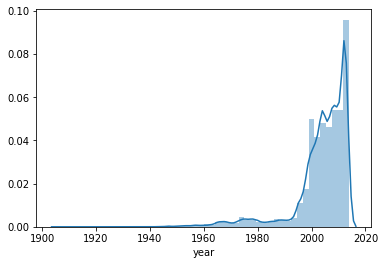

In [41]:
sns.distplot(ufo_sight['year'], kde = True)

Как мы видим, в прошлом веке НЛО видели гораздо реже, чем в этом. Возможно, это связано с развитием СМИ, либо инопланянетяне всерьез заинтересовались нашей планетой

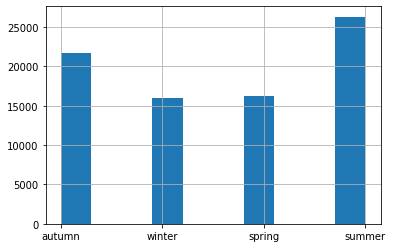

In [42]:
ufo_sight['season'].hist()

Чаще всего НЛО люди видят летом. А на втором месте осень

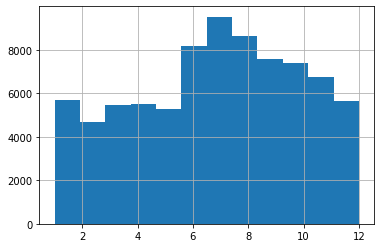

In [43]:
ufo_sight['month'].hist(bins=12)

Конкретно в июле - середина лета

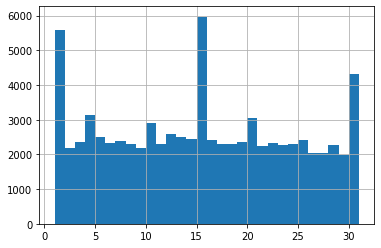

In [44]:
ufo_sight['day'].hist(bins=30)

А вот это уже интересно. То есть чаще всего НЛО видят 1, 15, 30 числа, причем разница существенная. Это можно объяснить либо отсутствием точных данных о дате (человек сказал, что видел НЛО в середине июля - поставим 15ое число), либо цикличностью наблюдений пришельцев за планетой Земля.

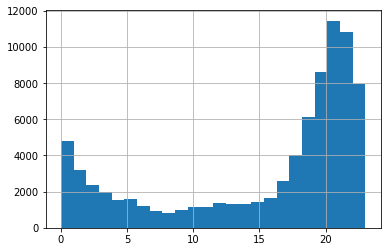

In [45]:
ufo_sight['hour'].hist(bins=24)

Чаще всего НЛО видят между 21:00 и 22:00. В принципе, исходя из данного распределения, с наступлением темного времени суток, вероятность увидеть НЛО существенно возрастает. Это понятно, ведь на темном небе светлый объект всегда заметнее.

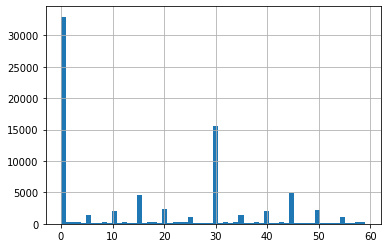

In [46]:
ufo_sight['minute'].hist(bins=60)

В графе минут с большим отрывом лидируют 0 и 30. Это объясняется тем, что люди очень редко помнят время с точностью до минуты, тем более если столкнулись с представителями инопланетных рас. Поэтому минуты это неинформативный столбец, выкидываем. 

In [47]:
ufo_sight.drop(['minute'], axis=1, inplace=True)

Посмотрим на относительное распределение времени суток к месяцу

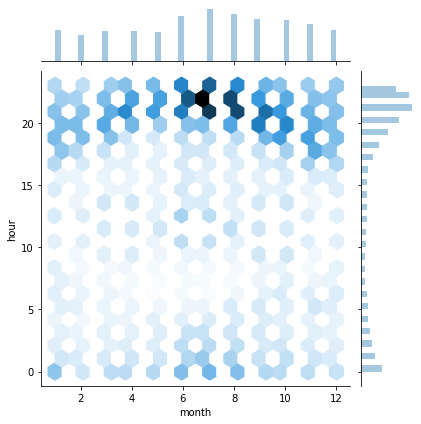

In [48]:
sns.jointplot(x='month', y='hour', data=ufo_sight, kind = 'hex',gridsize=20)

Как мы видим, летом НЛО видят в позднее время суток, весной и осенью немного раньше, а зимой - еще раньше. Это можно объяснить тем, что в странах, из которых в данном датасете большинство данных, зимой темнеет раньше.

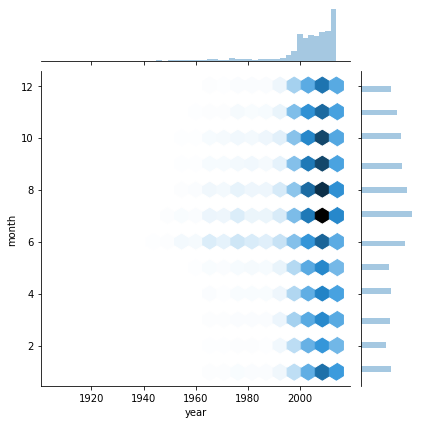

In [49]:
sns.jointplot(x='year', y='month', data=ufo_sight, kind = 'hex',gridsize=20)

В прошлом веке НЛО чаще видели в июне, а сейчас - в июле, хотя отличие несущественное.

Перейдем теперь к форме НЛО

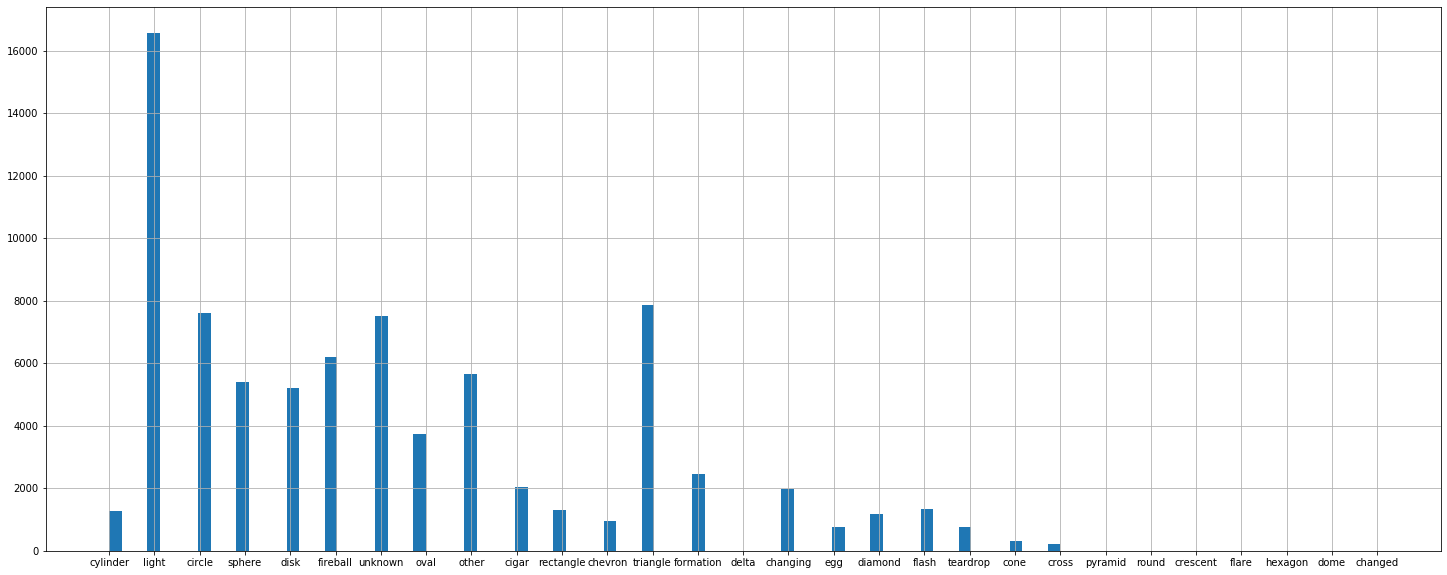

In [50]:
fig = plt.figure(figsize= (25,10))
ufo_sight['shape'].hist(bins=100)

С большим преимуществом лидирует просто свет, ведь он может быть вызван какой угодно обыденной вещью, а люди с хорошей фантазией придумывают целую историю. Но вот на втором месте, как ни странно, форма треугольника. Значит ли это, что инопланетные корабли все-таки треугольные, а не круглые, как тарелка? Так же интересно то, что достаточно часто люди видят огненный шар. Возможно, это корабли прищельцев, потерпевших крушение.

Посмотрим теперь на распределение продолжительности контакта

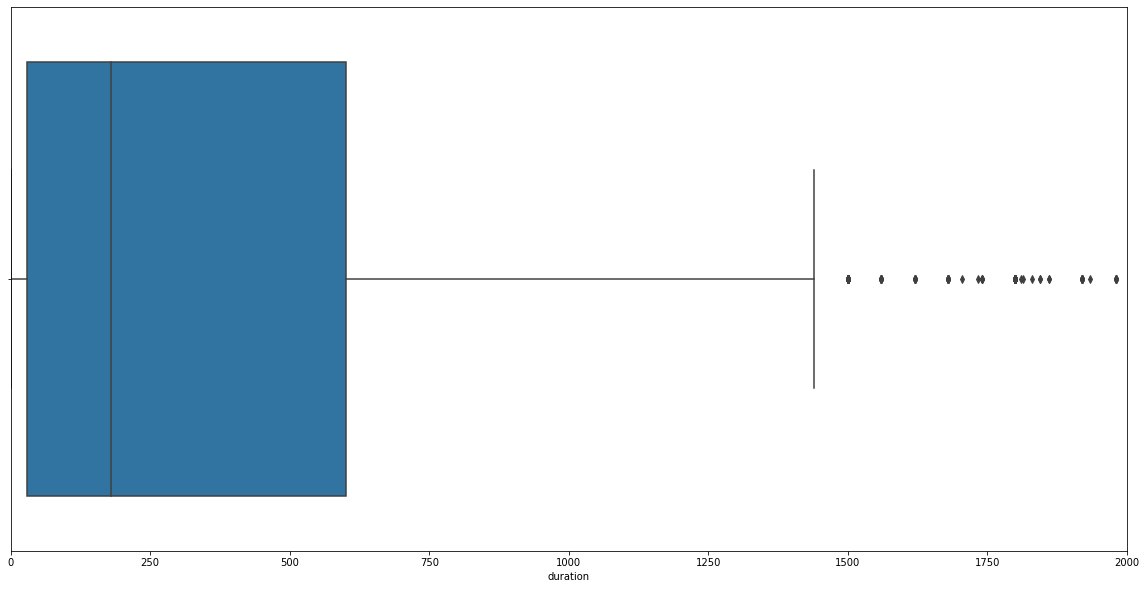

In [51]:
fig = plt.figure(figsize= (20,10))
plt.xlim(0, 2000)
sns.boxplot(x='duration', data=ufo_sight)

Похоже на распределение с медианой примерно 3.5 минуты и средним арифметическим 4.5 минуты. При этом 25ый процентиль крайне близок к нулю, а 75ый процентиль - примерно 10 минут, то есть вероятность того, что мы будем наблюдать НЛО дольше 10 минут примерно 25%, а наблюдать НЛО дольше 25 минут - меньше 1%. Однако есть в этой выборке очень интересные выбросы (из-за которых даже пришлось менять масштаб графика).

In [52]:
wow = ufo_sight['duration'].max()
wow

97836000.0

In [53]:
wow_minutes = wow / 60
wow_minutes

1630600.0

In [54]:
wow_hours = wow / 3600
wow_hours

27176.666666666668

In [55]:
wow_days = wow_hours / 24
wow_days

1132.361111111111

In [56]:
wow_years = wow_days / 365
wow_years

3.102359208523592

Конечно, вполне возможно, что это чья-то опечатка, но давайте пока не будем рассматривать этот вариант. То есть какой-то человек видел НЛО непрерывно на протяжении трёх лет! Интересно, как это происходило.

In [57]:
data_wow = ufo_sight[ufo_sight.duration == wow]
data_wow

,city,state,country,shape,duration,comments,latitude,longitude,year,day,month,season,hour
559,birmingham (uk/england),NaN,United Kingdom,sphere,97836000.0,Firstly&#44 I was stunned and stared at the ob...,52.466667,-1.916667,1983,1,10,autumn,17


То есть житель Бирмингема наблюдал летающую сферу с конца 1983го по 1987ой год! В интернете об этом ничего не сказано, поэтому вероятно это всё-таки опечатка. Хотя, кто знает, может быть англичанин 3 года жил вместе с маленькой инопланетной сферой. Может быть, в графе comments написано что-то интересное.

In [58]:
data_wow['comments'].values[0]

'Firstly&#44 I was stunned and stared at the object for what seemed minutes&#44 but probably was only seconds. My first inclination was to bec'

Всё-таки опечатка.

Пришло время вывести на карту все места, где видели НЛО.

In [59]:
lats = list(ufo_sight.latitude)
longs = list(ufo_sight.longitude)

In [60]:
import folium
from folium import plugins
places=[[x[0],x[1]] for x in zip(lats,longs)]

m = folium.Map(places[0], tiles = 'OpenStreetMap', zoom_start=1)

plugins.MarkerCluster(places).add_to(m)
plugins.FastMarkerCluster(places).add_to(m)

In [61]:
m

KeyboardInterrupt: 

Чаще всего НЛО видели в Америке - конкретно в Лос-Анджелесе, Нью-Йорке и Вашингтоне. Из интересного: 328 раз НЛО видели на Аляске, 5 раз в Киеве, 2 раза в Минске. По одному разу в Нижнем Новгороде, под Владимиром, в Хабаровске, на острове Сахалин и даже в Подольске. Также НЛО один раз видели близко к южному полюсу

## 5. Проверка статистических гипотез.

Сформулируем первую гипотезу. Хотелось бы знать, не изменилось ли распределение продолжительности наблюдения НЛО со временем. Ведь из того факта, что распределение продолжительности контакта увеличивается со временем может следовать, что инопланетяне все больше интересуются нашей планетой и, может быть, нам стоит начать паниковать.

H0: Распределение продолжительности контактов не меняется со временем

H1: Меняется

In [64]:
from scipy import stats

Разделим выборку пополам и сравним распределния первой и второй половины

In [65]:
dur = list(ufo_sight['duration'])

half1 = dur[:(len(dur)//2):]
half2 = dur[(len(dur)//2)::]
ufo_sight.loc[len(half1) - 1]

city                                                alexandria
state                                                       va
country                                          United States
shape                                                    light
duration                                                    20
comments     ((NUFORC Note:  Possible hoax.  PD))  Light th...
latitude                                               38.8047
longitude                                             -77.0472
year                                                      2004
day                                                          4
month                                                        4
season                                                  spring
hour                                                         3
Name: 40165, dtype: object

То есть пополам - получается примерно 2004 год

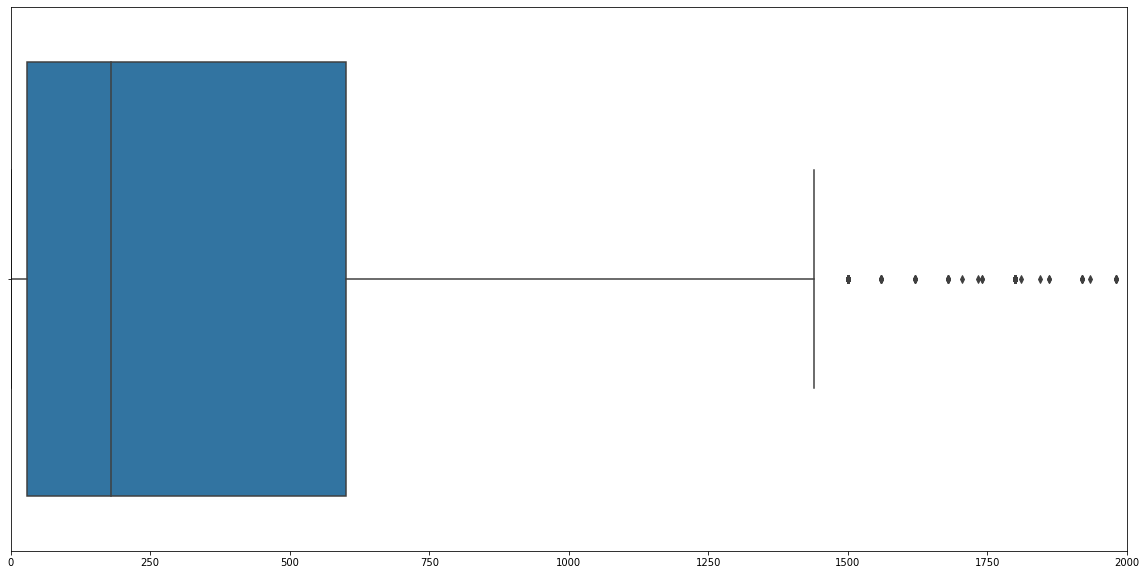

In [66]:
fig = plt.figure(figsize= (20,10))
plt.xlim(0, 2000)
sns.boxplot(x=half1)

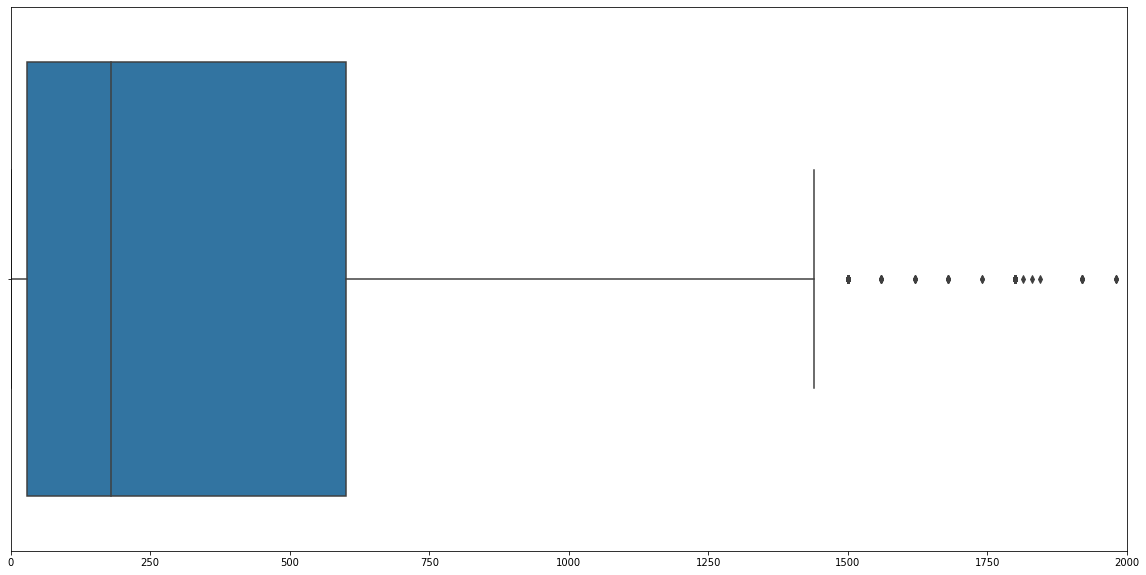

In [67]:
fig = plt.figure(figsize= (20,10))
plt.xlim(0, 2000)
sns.boxplot(x=half2)

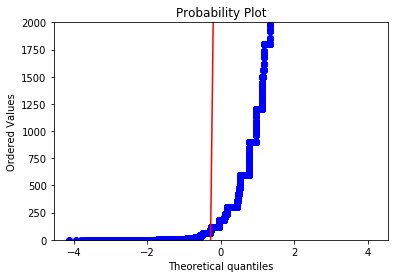

In [68]:
stats.probplot(half1, dist = "norm", plot = plt)
plt.ylim(0, 2000)
plt.show()

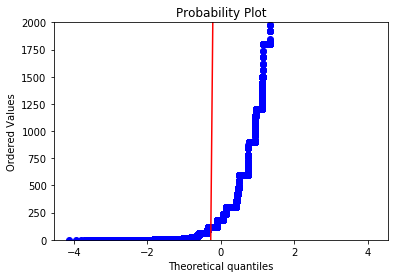

In [69]:
stats.probplot(half2, dist = "norm", plot = plt)
plt.ylim(0, 2000)
plt.show()

Выборки не имеют даже приближенно нормальное распределение, и очевидно не связаны, так как каждый контакт происходил при разных обстоятельствах. Попробуем использовать непараметрический критерий Манна-Уитни.

In [70]:
stats.mannwhitneyu(half1, half2, alternative='greater')

MannwhitneyuResult(statistic=782850744.5, pvalue=0.9999999999998008)

In [71]:
np.mean(half1)

8011.480926928248

In [72]:
np.mean(half2)

10022.297105761092

In [73]:
np.median(half1)

180.0

In [74]:
np.median(half2)

180.0

Хотя среднее второй половины немного больше, в целом критерий Манна-Уитни говорит нам, что распределения одинаковы. Поэтому, видимо, человечеству пока не нужно бояться вторжения.

Проверим теперь гипотезу о том, что доли форм объектов, которые видели люди, изменились со временем.

В этом случае верность гипотезы H1 с предположением о том, что инопланетяне существуют, будет означать, что они модифицируют свои корабли, предназначенные для исследования Земли. Верность гипотезы Н0 будет означать, что со временем ничего не меняется.

Снова разделим выборку пополам.

In [75]:
shape = list(ufo_sight['shape'])

half1 = shape[:(len(shape)//2):]
half2 = shape[(len(shape)//2)::]

In [76]:
half1

['cylinder',
 'light',
 'circle',
 'circle',
 'light',
 'sphere',
 'circle',
 'disk',
 'disk',
 'disk',
 'circle',
 'fireball',
 'disk',
 'unknown',
 'oval',
 'circle',
 'disk',
 'disk',
 'light',
 'other',
 'disk',
 'light',
 'light',
 'oval',
 'cigar',
 'other',
 'light',
 'rectangle',
 'chevron',
 'triangle',
 'oval',
 'unknown',
 'sphere',
 'unknown',
 'light',
 'disk',
 'circle',
 'other',
 'formation',
 'triangle',
 'chevron',
 'triangle',
 'unknown',
 'light',
 'unknown',
 'disk',
 'triangle',
 'triangle',
 'triangle',
 'unknown',
 'triangle',
 'formation',
 'unknown',
 'cigar',
 'unknown',
 'sphere',
 'light',
 'other',
 'cigar',
 'rectangle',
 'light',
 'sphere',
 'unknown',
 'unknown',
 'triangle',
 'light',
 'light',
 'cylinder',
 'delta',
 'sphere',
 'triangle',
 'other',
 'changing',
 'fireball',
 'cylinder',
 'cigar',
 'circle',
 'triangle',
 'triangle',
 'light',
 'egg',
 'fireball',
 'changing',
 'unknown',
 'other',
 'fireball',
 'sphere',
 'circle',
 'light',
 'sphere

Сначала будем рассматривать долю triangle в первой половине и во второй.

Рассмотрим Z критерий для несвязанных выборок так как выборки не являются парными результатами повторных экспериментов.

Н0: Доли треугольников одинаковы

Н1: Доля треугольников во второй части больше, чем в первой

In [77]:
tr1 = half1.count('triangle')
tr2 = half2.count('triangle')
count = np.array([tr1, tr2])
nobs = np.array([len(half1), len(half2)])

In [78]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count, nobs, alternative='smaller')

(4.83191398024001, 0.999999323866581)

В итоге получаем, что доли треугольников не меняются

Рассмотрим теперь то же самое для всех объектов, а не только для треугольников. Возможно, доля каких-то объектов сильно увеличилась во второй половине.

In [79]:
p_values = {}
nobs = np.array([len(half1), len(half2)])
for val in np.unique(shape):
    c1 = half1.count(val)
    c2 = half2.count(val)
    count = np.array([c1, c2])
    _, p_val = proportions_ztest(count, nobs, alternative='smaller')
    p_values[val] = p_val
p_values

{'changed': 0.15865374785523223,
 'changing': 0.9959922462336944,
 'chevron': 0.9999999999998596,
 'cigar': 2.304198824391183e-10,
 'circle': 0.02025941497005855,
 'cone': 0.6739774504491214,
 'crescent': 0.9213529801904446,
 'cross': 0.9617528638508009,
 'cylinder': 0.3364552000271701,
 'delta': 0.8715907340968638,
 'diamond': 0.9979893085790286,
 'disk': 1.4396966933427058e-16,
 'dome': 0.8413462521447678,
 'egg': 0.4564381744481704,
 'fireball': 0.9803565419293804,
 'flare': 0.8413462521447678,
 'flash': 0.8120466660826453,
 'formation': 0.9999999129030083,
 'hexagon': 0.8413462521447678,
 'light': 0.07508759400469504,
 'other': 0.4834897018131617,
 'oval': 0.05565764571889374,
 'pyramid': 0.8413462521447678,
 'rectangle': 0.22487336624276616,
 'round': 0.9213529801904446,
 'sphere': 5.241953819571894e-05,
 'teardrop': 0.20980359726983971,
 'triangle': 0.999999323866581,
 'unknown': 0.9997981817350112}

Как мы видим, со временем увеличилась доля объектов cigar, circle, disk, sphere. Для этих величин принимаем гипотезу Н1. Видимо, у инопланетян не так давно появилась мода на круглые корабли.

Рассмотрим теперь распределения широты и долготы.

In [80]:
longi = list(ufo_sight['longitude'])
lati = list(ufo_sight['latitude'])

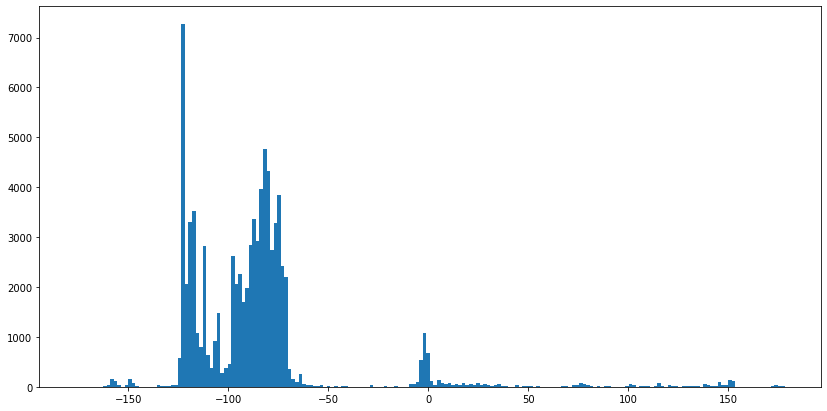

In [81]:
plt.figure(figsize=(14, 7))
plt.hist(longi, 200)
plt.show()

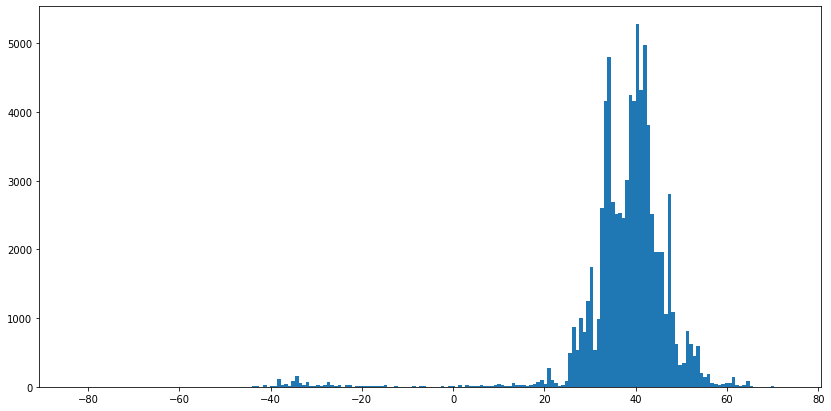

In [82]:
plt.figure(figsize=(14, 7))
plt.hist(lati, 200)
plt.show()

Посмотрим на корреляцию между широтой и долготой. Мало ли, может быть мы сможем с определенной вероятностью вычислить одно, зная другое.

In [83]:
stats.pearsonr(ufo_sight.longitude, ufo_sight.latitude)

(-0.390215424387354, 0.0)

Широта и долгота коррелируют. Значит, что зная широту места, где в следующий раз увидят НЛО, можно с определенной точностью рассчитать долготу. 

## 6. Предсказание временного ряда

Рассмотрим временной ряд широты за все время наблюдений и количества контактов в день за текущий век. Таким образом, попробуем предсказать широту и количество в день следующих контактов.

Для начала создадим столбец с датой и временем. Тот, который был в датасете изначально, не годится, так как в нем слишком много опечаток.

In [84]:
import statsmodels.api as sm
from pylab import rcParams

In [85]:
year = list(ufo_sight['year'])
month = list(ufo_sight['month'])
day = list(ufo_sight['day'])
hour = list(ufo_sight['hour'])
datetime = ['{:04d}-{:02d}-{:02d} 00:00:00'.format(year[i], month[i], day[i]) for i in range(80332)]
datetime

['1949-10-10 00:00:00',
 '1949-10-10 00:00:00',
 '1955-10-10 00:00:00',
 '1956-10-10 00:00:00',
 '1960-10-10 00:00:00',
 '1961-10-10 00:00:00',
 '1965-10-10 00:00:00',
 '1965-10-10 00:00:00',
 '1966-10-10 00:00:00',
 '1966-10-10 00:00:00',
 '1968-10-10 00:00:00',
 '1968-10-10 00:00:00',
 '1970-10-10 00:00:00',
 '1970-10-10 00:00:00',
 '1971-10-10 00:00:00',
 '1972-10-10 00:00:00',
 '1972-10-10 00:00:00',
 '1973-10-10 00:00:00',
 '1973-10-10 00:00:00',
 '1974-10-10 00:00:00',
 '1974-10-10 00:00:00',
 '1974-10-10 00:00:00',
 '1975-10-10 00:00:00',
 '1976-10-10 00:00:00',
 '1976-10-10 00:00:00',
 '1977-10-10 00:00:00',
 '1977-10-10 00:00:00',
 '1978-10-10 00:00:00',
 '1979-10-10 00:00:00',
 '1979-10-10 00:00:00',
 '1979-10-10 00:00:00',
 '1979-10-10 00:00:00',
 '1980-10-10 00:00:00',
 '1980-10-10 00:00:00',
 '1980-10-10 00:00:00',
 '1982-10-10 00:00:00',
 '1984-10-10 00:00:00',
 '1984-10-10 00:00:00',
 '1984-10-10 00:00:00',
 '1985-10-10 00:00:00',
 '1986-10-10 00:00:00',
 '1988-10-10 00:

Создадим временной ряд широты, прибавляем 180, чтобы он был неотрицательный

In [86]:
lati = ufo_sight[['latitude']]
lati['datetime'] = datetime
datetime = pd.to_datetime(datetime, format='%Y-%m-%d %H:%M:%S')
lati['datetime'] = datetime
lati.drop_duplicates(['datetime'], inplace=True)
lati.sort_values('datetime', axis=0, inplace =True)
lati.index = lati['datetime']
lati.drop(['datetime'], axis=1, inplace=True)
lati = lati.iloc[-1000:]
lati['latitude'] += 180
lati

/Users/azelentsov/PycharmProjects/sphere/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/azelentsov/PycharmProjects/sphere/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/azelentsov/PycharmProjects/sphere/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,latitude
datetime,
2011-08-13,218.249444
2011-08-14,225.783333
2011-08-15,222.546944
2011-08-16,219.008611
2011-08-17,227.381111
...,...
2014-05-04,212.813889
2014-05-05,220.037778
2014-05-06,214.823889


Исходный временной ряд

/Users/azelentsov/PycharmProjects/sphere/myenv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


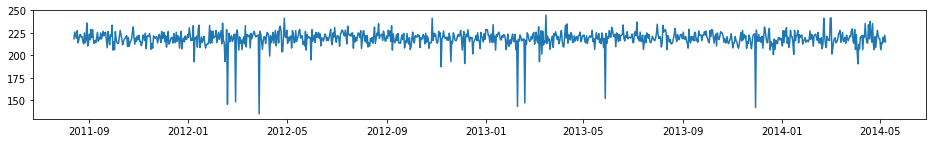

In [87]:
plt.figure(figsize=(16,2))

plt.plot(lati.latitude)
plt.show()

Декомпозируем, возьмём частоту в 30 наблюдений

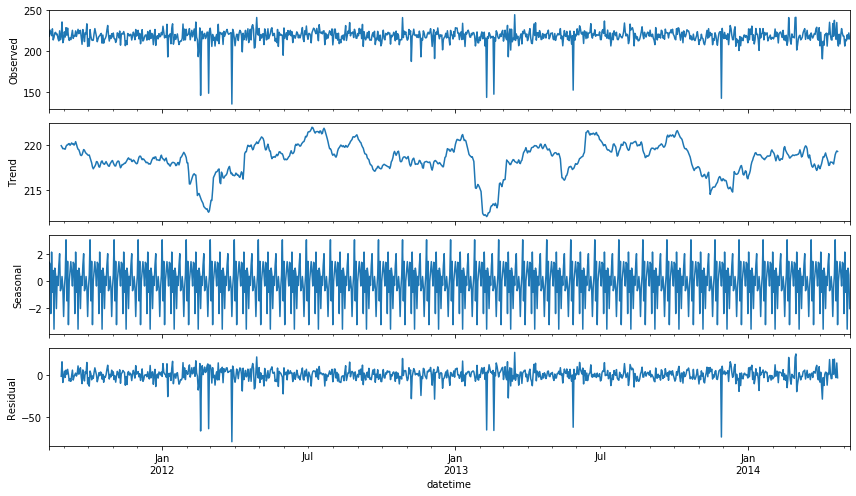

In [88]:
rcParams['figure.figsize'] = 12, 7
result = sm.tsa.seasonal_decompose(lati.latitude, model='additive',freq=30)
result.plot()
plt.show()

Ряд не имеет тренда, но, похоже, имеет мультипликативную сезонность

Попробуем тройное экспоненциальное сглаживание, проведем для него валидацию как делали на семинаре и посмотрим на ошибку. В качестве метрики для ошибки возьмем относительную ошибку в процентах

In [89]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.model_selection import TimeSeriesSplit 

In [90]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [91]:
errors = []
    
tscv = TimeSeriesSplit(n_splits=3) 

for train, test in tscv.split(lati.latitude):

    model = ExponentialSmoothing(np.asarray(lati.latitude.iloc[train]), seasonal_periods=33, seasonal='mul').fit()
    
    forecast = pd.Series(model.forecast(len(test)))
    actual = lati.latitude.iloc[test]
    error = mean_absolute_percentage_error(actual.values, forecast.values)
    errors.append(error)

In [92]:
errors

[2.845256531204333, 2.838574079070288, 2.7225758412904555]

In [93]:
np.mean(errors)

2.802135483855025

Попробуем предсказать широты контактов за последние 14 раз, то есть за последние две недели наблюдений

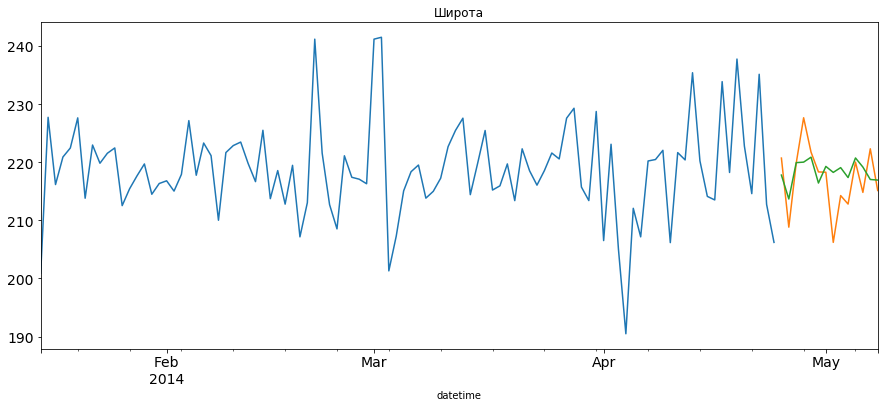

In [94]:
train = lati.latitude.iloc[:-14]
test = lati.latitude.iloc[-14:]
train.iloc[-100:].plot( figsize=(15,6),title= 'Широта', fontsize=14)
test.plot( figsize=(15,6),title= 'Широта', fontsize=14)
forecast = test.copy()

fit1 = ExponentialSmoothing(np.asarray(train), seasonal_periods=33, trend=None, seasonal='mul',).fit()
forecast = pd.Series(fit1.forecast(len(test)))
forecast.index = test.index
forecast.plot( figsize=(15,6),title= 'Широта', fontsize=14)

В начале мая есть неточность, но в целом работает хорошо, метрика подтверждает

Предскажем широты следующих 10 замечаний НЛО

In [95]:
fit2 = ExponentialSmoothing(np.asarray(lati.latitude), seasonal_periods=33, trend=None, seasonal='mul').fit()
forecast2 = pd.Series(fit1.forecast(10))
forecast2 - 180

0    37.804788
1    33.687336
2    39.948086
3    40.036460
4    40.891043
5    36.435836
6    39.298771
7    38.267691
8    39.090723
9    37.376301
dtype: float64

Теперь разберемся с количеством следующих контактов

Для начала сформируем нужный вам временной ряд

In [96]:
year = list(ufo_sight['year'])
month = list(ufo_sight['month'])
day = list(ufo_sight['day'])
hour = list(ufo_sight['hour'])
datetime = ['{:04d}-{:02d}-{:02d} 00:00:00'.format(year[i], month[i], day[i]) for i in range(80332)]
dat = ufo_sight
dat['datetime'] = datetime
vl = dat['datetime'].value_counts()
vl = dict(vl)
vl

{'2010-07-04 00:00:00': 202,
 '2012-07-04 00:00:00': 182,
 '1999-11-16 00:00:00': 180,
 '2013-07-04 00:00:00': 176,
 '2011-07-04 00:00:00': 146,
 '2009-09-19 00:00:00': 126,
 '2014-01-01 00:00:00': 93,
 '2013-12-31 00:00:00': 89,
 '2004-10-31 00:00:00': 85,
 '2009-07-04 00:00:00': 84,
 '2013-07-06 00:00:00': 78,
 '2013-01-01 00:00:00': 70,
 '2012-01-01 00:00:00': 69,
 '1997-03-13 00:00:00': 69,
 '2012-12-31 00:00:00': 69,
 '2011-07-03 00:00:00': 67,
 '2012-08-18 00:00:00': 65,
 '1997-07-04 00:00:00': 65,
 '2008-07-04 00:00:00': 62,
 '1999-09-01 00:00:00': 60,
 '2005-09-30 00:00:00': 59,
 '2011-12-31 00:00:00': 57,
 '2013-09-28 00:00:00': 57,
 '2012-08-07 00:00:00': 56,
 '2006-10-01 00:00:00': 56,
 '2010-07-03 00:00:00': 55,
 '2003-11-08 00:00:00': 54,
 '2013-12-24 00:00:00': 54,
 '2004-08-21 00:00:00': 53,
 '2013-08-24 00:00:00': 52,
 '2013-08-10 00:00:00': 51,
 '2004-08-31 00:00:00': 51,
 '2013-07-13 00:00:00': 50,
 '2013-11-28 00:00:00': 50,
 '2013-06-22 00:00:00': 49,
 '2001-12-01 0

In [97]:
dates = pd.date_range(start="01/01/2000 00:00:00", end="05/01/2014 00:00:00")
dates = [str(date) for date in dates]
dates

['2000-01-01 00:00:00',
 '2000-01-02 00:00:00',
 '2000-01-03 00:00:00',
 '2000-01-04 00:00:00',
 '2000-01-05 00:00:00',
 '2000-01-06 00:00:00',
 '2000-01-07 00:00:00',
 '2000-01-08 00:00:00',
 '2000-01-09 00:00:00',
 '2000-01-10 00:00:00',
 '2000-01-11 00:00:00',
 '2000-01-12 00:00:00',
 '2000-01-13 00:00:00',
 '2000-01-14 00:00:00',
 '2000-01-15 00:00:00',
 '2000-01-16 00:00:00',
 '2000-01-17 00:00:00',
 '2000-01-18 00:00:00',
 '2000-01-19 00:00:00',
 '2000-01-20 00:00:00',
 '2000-01-21 00:00:00',
 '2000-01-22 00:00:00',
 '2000-01-23 00:00:00',
 '2000-01-24 00:00:00',
 '2000-01-25 00:00:00',
 '2000-01-26 00:00:00',
 '2000-01-27 00:00:00',
 '2000-01-28 00:00:00',
 '2000-01-29 00:00:00',
 '2000-01-30 00:00:00',
 '2000-01-31 00:00:00',
 '2000-02-01 00:00:00',
 '2000-02-02 00:00:00',
 '2000-02-03 00:00:00',
 '2000-02-04 00:00:00',
 '2000-02-05 00:00:00',
 '2000-02-06 00:00:00',
 '2000-02-07 00:00:00',
 '2000-02-08 00:00:00',
 '2000-02-09 00:00:00',
 '2000-02-10 00:00:00',
 '2000-02-11 00:

In [98]:
mas = []
for date in dates:
    if date in vl:
        mas.append(vl[date])
    else:
        mas.append(0)
data = pd.DataFrame({'datetime' : dates, 'counts' : mas})
data['datetime'] = pd.to_datetime(data.datetime,format='%Y-%m-%d %H:%M:%S')
data.sort_values('datetime',axis = 0,inplace =True)
data.index = data['datetime']
data['counts'] = data['counts'].astype('float64')
data.drop(['datetime'], axis=1, inplace=True)
data

,counts
datetime,
2000-01-01,18.0
2000-01-02,23.0
2000-01-03,4.0
2000-01-04,6.0
2000-01-05,12.0
...,...
2014-04-27,30.0
2014-04-28,8.0
2014-04-29,14.0


Декомпозируем его

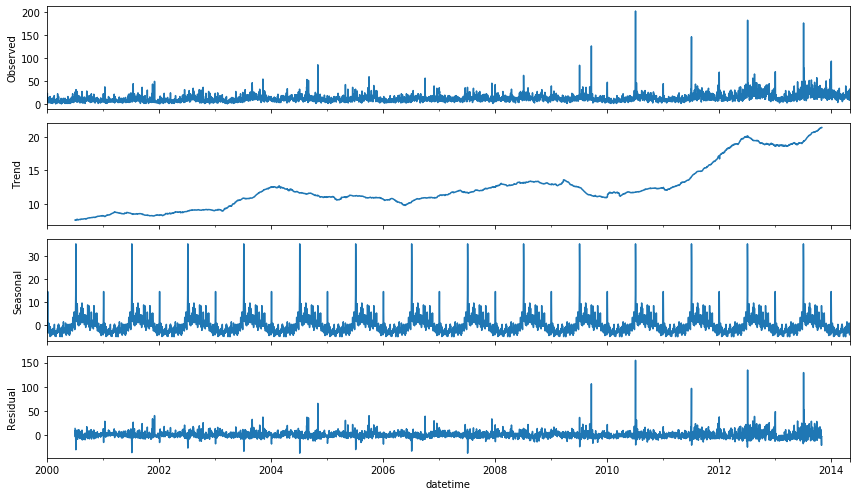

In [99]:
rcParams['figure.figsize'] = 12, 7
result = sm.tsa.seasonal_decompose(data.counts, model='additive',freq= 365)
result.plot()
plt.show()

У ряда, видимо, все-таки есть аддитивный тренд и нет сезонности

Применим к нему линейную регрессию, как делали на семинаре

In [100]:
sample_data_df = data.iloc[-1000:]

In [101]:
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

In [102]:
lag_period = 14
features = []
for period_mult in range(1,10):
    sample_data_df["lag_period_{}".format(period_mult)] = sample_data_df.counts.shift(period_mult*lag_period)
    features.append("lag_period_{}".format(period_mult))

sample_data_df['lagf_min'] = sample_data_df[features].min(axis = 1)
sample_data_df['lagf_max'] = sample_data_df[features].max(axis = 1)
sample_data_df['lagf_mean'] = sample_data_df[features].mean(axis = 1)
sample_data_df['lagf_median'] = sample_data_df[features].median(axis = 1)    

features.extend(['lagf_min', 'lagf_max', 'lagf_mean', 'lagf_median'])

/Users/azelentsov/PycharmProjects/sphere/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/azelentsov/PycharmProjects/sphere/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/azelentsov/PycharmProjects/sphere/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [103]:
train = sample_data_df.iloc[:-14].dropna()
test = sample_data_df.iloc[-14:]
print(test['counts'])

n = pd.DataFrame({'counts': [0] * len(test.index)})
n.index = test.index

model = LinearRegression()
model.fit(train[features],train['counts'] )
forecast = model.predict(test[features])

datetime
2014-04-18    24.0
2014-04-19    27.0
2014-04-20    25.0
2014-04-21    11.0
2014-04-22    20.0
2014-04-23    15.0
2014-04-24    24.0
2014-04-25    14.0
2014-04-26    19.0
2014-04-27    30.0
2014-04-28     8.0
2014-04-29    14.0
2014-04-30    15.0
2014-05-01    32.0
Name: counts, dtype: float64


In [104]:
n['counts'] = forecast
forecast

array([19.77472049, 25.11196192, 17.71444229, 16.84155408, 17.49282644,
       17.70189935, 19.80186341, 20.54762805, 21.27859426, 16.39505915,
       16.75113934, 14.67631759, 14.52106263, 16.73739845])

In [105]:
mean_absolute_percentage_error(test['counts'], forecast)

30.29327872336954

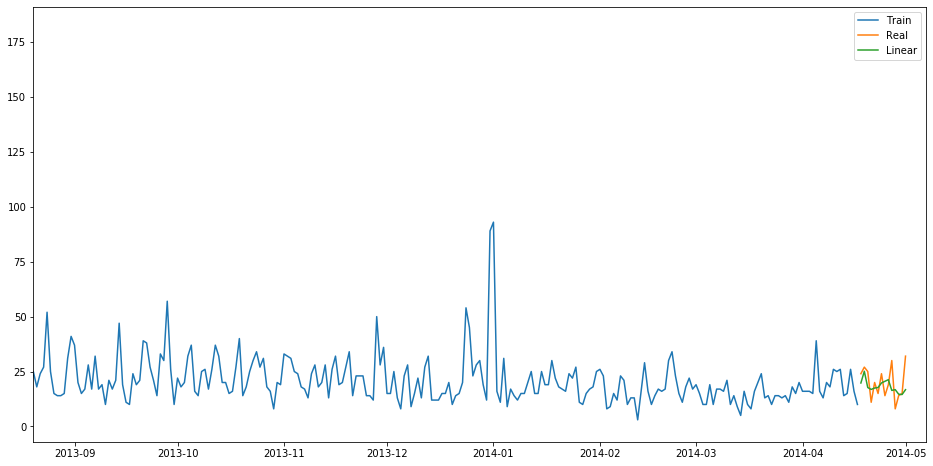

In [106]:
plt.figure(figsize=(16,8))
plt.plot(train.counts, label='Train')
plt.plot(test.counts, label='Real')
plt.plot(n.counts, label='Linear')
plt.legend(loc='best')
plt.xlim(735100, 735360)
plt.show()

Сделаем предсказание количества "контактов" на две недели вперед.

In [107]:
lag_period = 14
features = []
new_data = pd.DataFrame({})
mas = list(sample_data_df['counts'])
for period_mult in range(1,10):
    sl = len(mas) - 14*period_mult
    new_data["lag_period_{}".format(period_mult)] = mas[sl: (sl + 14):]
    features.append("lag_period_{}".format(period_mult))

new_data['lagf_min'] = new_data[features].min(axis = 1)
new_data['lagf_max'] = new_data[features].max(axis = 1)
new_data['lagf_mean'] = new_data[features].mean(axis = 1)
new_data['lagf_median'] = new_data[features].median(axis = 1)    

features.extend(['lagf_min', 'lagf_max', 'lagf_mean', 'lagf_median'])

In [108]:
new_data

,lag_period_1,lag_period_2,lag_period_3,lag_period_4,lag_period_5,lag_period_6,lag_period_7,lag_period_8,lag_period_9,lagf_min,lagf_max,lagf_mean,lagf_median
0,24.0,15.0,13.0,17.0,30.0,23.0,22.0,15.0,28.0,13.0,30.0,20.777778,22.0
1,27.0,39.0,14.0,17.0,34.0,21.0,27.0,20.0,30.0,14.0,39.0,25.444444,27.0
2,25.0,16.0,10.0,16.0,23.0,10.0,11.0,25.0,19.0,10.0,25.0,17.222222,16.0
3,11.0,13.0,14.0,21.0,15.0,13.0,10.0,15.0,12.0,10.0,21.0,13.777778,13.0
4,20.0,20.0,14.0,10.0,11.0,13.0,15.0,15.0,89.0,10.0,89.0,23.000000,15.0
5,15.0,18.0,13.0,14.0,18.0,3.0,17.0,25.0,93.0,3.0,93.0,24.000000,17.0
6,24.0,26.0,14.0,9.0,22.0,16.0,18.0,19.0,16.0,9.0,26.0,18.222222,18.0
7,14.0,25.0,11.0,5.0,17.0,29.0,25.0,19.0,11.0,5.0,29.0,17.333333,17.0
8,19.0,26.0,18.0,16.0,19.0,16.0,26.0,30.0,31.0,16.0,31.0,22.333333,19.0
9,30.0,14.0,15.0,10.0,15.0,10.0,23.0,22.0,9.0,9.0,30.0,16.444444,15.0


In [109]:
model = LinearRegression()
sample_data_df = sample_data_df.dropna()
model.fit(sample_data_df[features], sample_data_df['counts'] )
forecast = model.predict(new_data[features])

In [110]:
[round(x) for x in forecast]

[21.0,
 25.0,
 20.0,
 17.0,
 8.0,
 8.0,
 21.0,
 19.0,
 19.0,
 20.0,
 16.0,
 19.0,
 19.0,
 21.0]

## 7. Выводы

В данном исследовании удалось установить:
* Количество наблюдений НЛО сильно увеличилось по сравнению с прошлым веком, возможно, это связано с банальным развитием СМИ и популяризацией этого в Америке
* НЛО чаще всего видят в темное время суток, вечером, но не ночью
* Чаще всего НЛО видят летом, в июле
* НЛО заметно чаще видят 1, 15 и 30 числа (может быть просто неточностью в данных)
* Чаще всего люди видят НЛО в виде света на небе, чуть реже в форме летающего треугольника или летающей тарелки
* Шанс наблюдать НЛО дольше 10 минут - 25%, а шанс наблюдать НЛО дольше 25 минут меньше 1%, то есть инопланетяне, если они существуют, не очень любят, когда за ними наблюдают
* Чаще всего НЛО видели в Америке, на втором месте - Великобритания. Если смотреть статистику по городам, то лидирует Сиэтл, если смотреть по карте - то Лос-Анджелес.
* Из городов СНГ чаще всего НЛО видели в Киеве - 5 раз
* Распределение продолжительности контакта не меняется со временем. То есть инопланятяне, если они есть, изучают Землю короткими подходами
* С 2004 года увеличилась доля тарелкообразных НЛО и уменьшилась доля треугольников. Это может означать постепенную модификацию кораблей пришельцев
* Широта и долгота появлений НЛО коррелируют, это может связано с тем, что подавляющее большинство "контактов" произошло на одном континенте
* 10 следующих контактов будут на широтах 37.804788, 33.687336, 39.948086, 40.036460, 40.891043, 36.435836, 39.298771, 38.267691, 39.090723, 37.376301 (так как данные обрываются на 2014 году, то слово следующих уже не актуально)
* Люди видят НЛО несезонно, то есть периодичности в появлениях НЛО не прослеживается
* За первые две недели мая 2014го люди увидели НЛО 21, 25, 20, 17, 8, 8, 21, 19, 19, 20, 16, 19, 19, 21 раз в день соответственно